<a href="https://colab.research.google.com/github/harsimran4355707/Data-Exploration-using-Python/blob/main/Diabetes-Project%20amendment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members**: Harsimran Singh (4355707) and Sunil Singh (4355829)

In this project, we have tried to add some new codes especially graphical representations to understand the data and draw graphs for diseases like Polyphagia, Polydypsia and Polyuria. Moreover, we tried to make graphical charts for comparison between class and weakness rate.

The early diagnosis of diabetes is only possible by proper assessment of both common and less common sign symptoms, which could be found in different phases from disease initiation up to diagnosis. Data mining classification techniques have been well accepted by researchers for risk prediction model of the disease. To predict the likelihood of having diabetes requires a dataset, which contains the data of newly diabetic or would be diabetic patient. In this work, we have used such a dataset of 520 instances, which has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh. We have analyzed the dataset with Naive Bayes Algorithm, Logistic Regression Algorithm, and Random Forest Algorithm and after applying tenfold Cross- Validation and Percentage Split evaluation techniques, Random forest has been found having best accuracy on this dataset. Finally, a commonly accessible, user-friendly tool for the end user to check the risk of having diabetes from assessing the symptoms and useful tips to control over the risk factors has been proposed. Paper link:https://link.springer.com/chapter/10.1007/978-981-13-8798-2_12?ref=https://coder.social

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print(RandomForestClassifier(n_estimators=500))

RandomForestClassifier(n_estimators=500)


In [ ]:
url= 'https://drive.google.com/file/d/1asit0DWv9yRCERtpKlyM2HCFNI4YAupn/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
ds = pd.read_csv(dwn_url)
ds.head(100)

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,yes
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,yes
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0,yes
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,yes
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,1,0,0,1,1,0,0,1,0,0,0,yes
96,1,1,1,1,0,0,0,1,0,1,1,1,0,0,yes
97,1,1,1,1,1,0,0,1,1,0,1,1,0,0,yes
98,1,1,0,0,0,0,1,0,0,0,0,0,1,0,yes


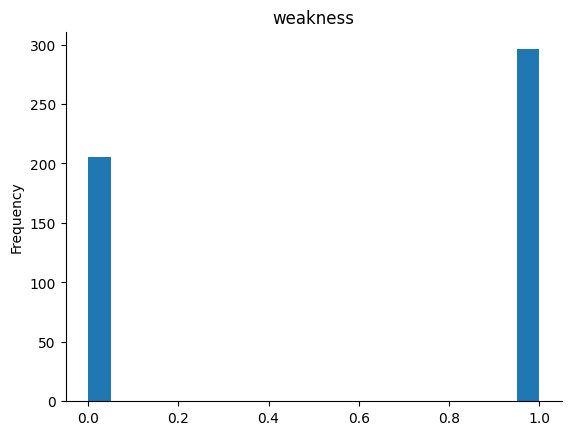

In [ ]:
# @title weakness

from matplotlib import pyplot as plt
ds['weakness'].plot(kind='hist', bins=20, title='weakness')
plt.gca().spines[['top', 'right',]].set_visible(False)

here is the comparison of class with the possibility of weight loss

<ipython-input-13-bef17fbf8708>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ds, x='sudden weight loss', y='class', inner='box', palette='Dark2')


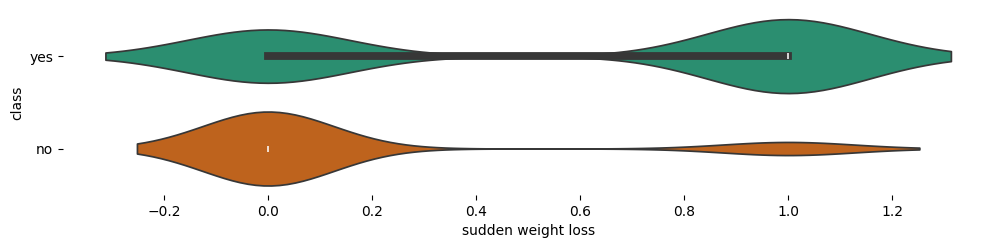

In [ ]:
# @title class vs sudden weight loss

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ds['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ds, x='sudden weight loss', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

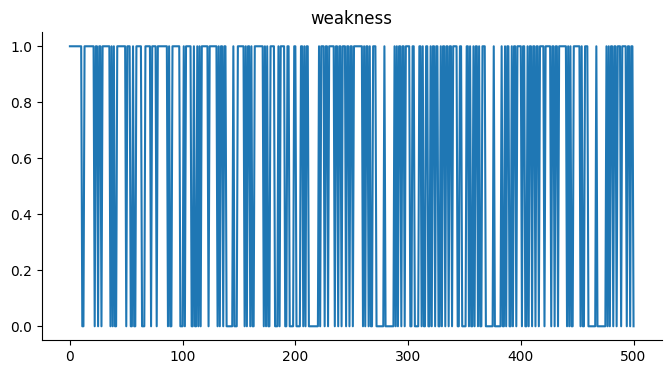

In [ ]:
# @title weakness

from matplotlib import pyplot as plt
ds['weakness'].plot(kind='line', figsize=(8, 4), title='weakness')
plt.gca().spines[['top', 'right']].set_visible(False)

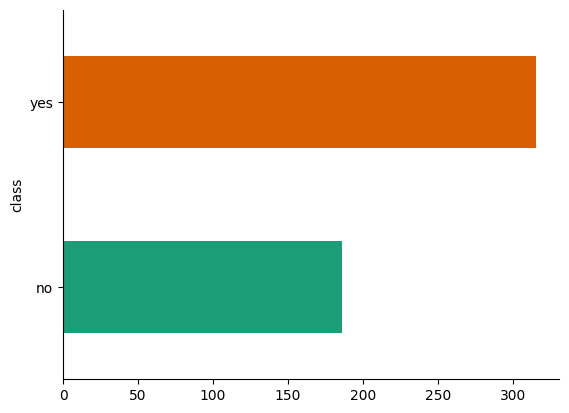

In [ ]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
ds.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
    for col_name in data.columns:
        data[col_name] = number.fit_transform(data[col_name])
        data=data.fillna(-999)
    return data

In [ ]:
dataset = convert(ds)
dataset.head(100)

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1
96,1,1,1,1,0,0,0,1,0,1,1,1,0,0,1
97,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1
98,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [ ]:
from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

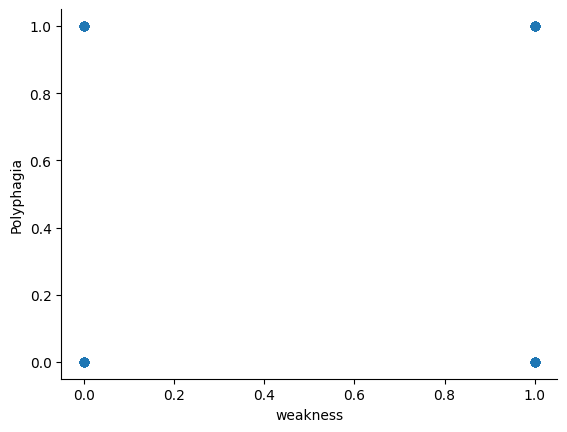

In [ ]:
# @title weakness vs Polyphagia

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='weakness', y='Polyphagia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = dataset.drop('class', axis=1)
Y = dataset['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

afterthat

In [ ]:
from sklearn.externals import joblib
  import pickle

IndentationError: unexpected indent (<ipython-input-50-1247aa3db52d>, line 2)

In [ ]:
filename = "Completed_model.joblib"
 joblib.dump(random_forest, filename)

IndentationError: unexpected indent (<ipython-input-52-d42614d9f855>, line 2)

In [ ]:
loaded_model = joblib.load(filename)
   result = loaded_model.score(X_test, Y_test)
   print(result)

In [ ]:
print(random_forest.predict([X_test.iloc[3]])) #A single instance in the test dataset

In [ ]:
url= 'https://drive.google.com/file/d/1asit0DWv9yRCERtpKlyM2HCFNI4YAupn/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dst = pd.read_csv(dwn_url)
dst.head(40)


,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,yes
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,yes
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0,yes
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,yes
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,yes
5,1,1,0,1,1,0,1,1,0,1,0,1,1,1,yes
6,1,1,0,1,1,1,0,0,0,1,1,0,0,0,yes
7,1,1,1,1,0,0,1,1,1,0,1,1,0,0,yes
8,1,1,0,1,1,1,0,1,1,0,1,1,0,1,yes
9,0,1,1,1,1,0,1,1,1,0,0,0,1,0,yes


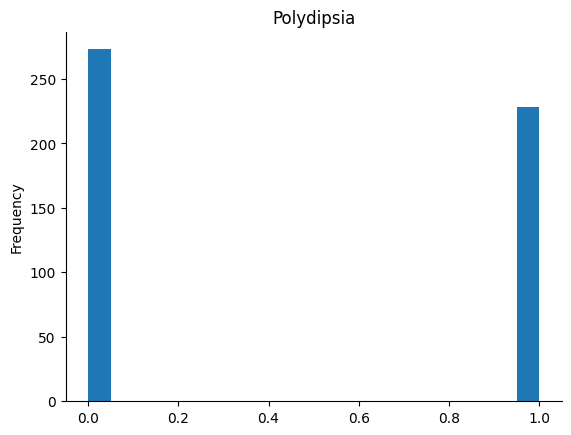

In [ ]:
# @title Polydipsia

from matplotlib import pyplot as plt
dst['Polydipsia'].plot(kind='hist', bins=20, title='Polydipsia')
plt.gca().spines[['top', 'right',]].set_visible(False)

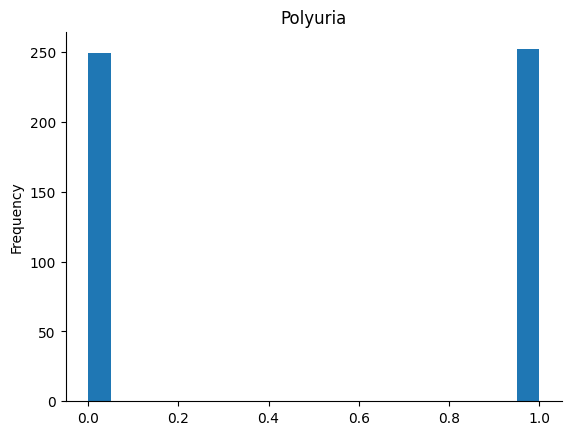

In [ ]:
# @title Polyuria

from matplotlib import pyplot as plt
dst['Polyuria'].plot(kind='hist', bins=20, title='Polyuria')
plt.gca().spines[['top', 'right',]].set_visible(False)

In this way, we made some amendments in this code and tried to add some graphical representations in the project to understand the data in easy manner alon with comparisons.